In [1]:
import sympy as sp
import minterpy as mp
import numpy as np
from minterpy.pointcloud_utils import *

from mpl_toolkits import mplot3d
%matplotlib inline

from mpl_toolkits.mplot3d import axes3d

import torch
import torchvision
from torchvision import transforms, datasets

import random
import numpy as np
import matplotlib.pyplot as plt

import os
from operator import itemgetter

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import ot

from sklearn.neighbors import NearestNeighbors

import ripser
import persim
from persim import plot_diagrams

from operator import itemgetter


#do pip installs as follows to use vedo for plotting point clouds
#pip install vedo
#pip install ipyvtklink

import numpy as np
from vedo import *

import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D

import time


In [2]:
x, y, z = sp.symbols('x y z')

expr = x**2 + y**2 + z**2 - 1
poly = sp.Poly(expr, x, y, z)

In [3]:
# convert sympy polynomial to minyterpy polynomial
newt_poly = sympy_to_mp(poly, mp.NewtonPolynomial)

In [4]:
#sample points
point_data = sample_points_on_poly(50,        # Number of points to be sampled
                                   newt_poly,  # Polynomial in Newton basis
                                   bounds=1, # Boundary of the Cubic domain to be sampled
                                   tol=1e-15)  # Tolerance in solution

In [5]:
def _compute_distance_matrix(x, p=2):
    x_flat = x.view(x.size(0), -1)

    distances = torch.norm(x_flat[:, None] - x_flat, dim=2, p=p)

    return distances

In [6]:

x_so = point_data[:,0]

y_so = point_data[:,1]

z_so = point_data[:,2]


plot_points = [x_so,y_so,z_so]
Points(plot_points).show(axes=1)

ViewInteractiveWidget(height=960, layout=Layout(height='auto', width='100%'), width=960)

In [7]:
point_data = torch.tensor(point_data)

dist_matrix = _compute_distance_matrix(point_data, p=2)

start = time.time()

diagrams = ripser.ripser(dist_matrix.cpu().detach().numpy(), distance_matrix=True, maxdim=2)['dgms']

end = time.time()

print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.012126922607421875


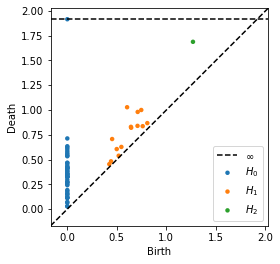

In [8]:
plot_diagrams(diagrams, show=True)

In [9]:
#trials on torus

In [10]:
## Torus
R = 1.5
r = 0.7
expr_torus = (x**2 + y**2 + z**2 + R**2 - r**2)**2 - 4*R**2*(x**2 + y**2)


In [11]:
poly_torus = sp.Poly(expr_torus, x, y, z)

In [12]:
sp.expand(expr_torus)

1.0*x**4 + 2.0*x**2*y**2 + 2.0*x**2*z**2 - 5.48*x**2 + 1.0*y**4 + 2.0*y**2*z**2 - 5.48*y**2 + 1.0*z**4 + 3.52*z**2 + 3.0976

In [13]:
#Convert sympy polynomial to minterpy polynomial

newt_poly_torus = sympy_to_mp(poly_torus, mp.NewtonPolynomial)

In [14]:
#Sample points on the zero isocontour
def points_on_torus(num_points):
    
    point_data_torus = sample_points_on_poly(num_points,        # Number of points to be sampled
                                       newt_poly_torus,  # Polynomial in Newton basis
                                       bounds=3.0, # Boundary of the Cubic domain to be sampled
                                       tol=1e-15)  # Tolerance in solution
    
    return point_data_torus

In [28]:
points_1 = points_on_torus(500)

In [29]:

x_so = points_1[:,0]

y_so = points_1[:,1]

z_so = points_1[:,2]


plot_points = [x_so,y_so,z_so]
Points(plot_points).show(axes=1)

ViewInteractiveWidget(height=960, layout=Layout(height='auto', width='100%'), width=960)

In [30]:
point_data = torch.tensor(points_1)

dist_matrix = _compute_distance_matrix(point_data, p=2)

start = time.time()

diagrams = ripser.ripser(dist_matrix.cpu().detach().numpy(), distance_matrix=True, maxdim=2)['dgms']

end = time.time()

print(f"Runtime of the program is {end - start}")

Runtime of the program is 11.755108118057251


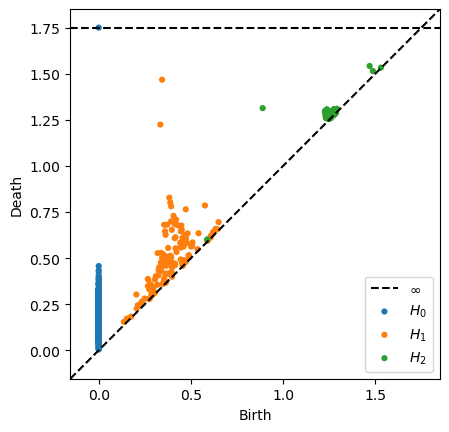

In [31]:
plot_diagrams(diagrams, show=True)

In [32]:
def PointsInCircumNDim(points, transform_to_nD):
    circle_nD = np.matmul(points, transform_to_nD)
    return circle_nD

# transform to torus from 3d space to 15d space
dim = 1024
transform_to_nD = 4*np.random.rand(3, dim)-2
print(transform_to_nD)

data_tr = torch.from_numpy(PointsInCircumNDim(np.array(points_1), transform_to_nD)).float()


[[ 0.50348376  1.51758548 -1.10723285 ... -0.89520346  0.70943981
   1.42768504]
 [ 1.06924956 -0.73602665  0.33266791 ...  1.56986669 -1.05075934
  -0.94165355]
 [ 0.3169368   0.76898368 -1.73806537 ...  0.62960685  1.18657811
  -0.85079396]]


In [33]:
data_tr.shape

torch.Size([500, 1024])

In [34]:
#point_data = torch.tensor(points_1)

dist_matrix = _compute_distance_matrix(data_tr, p=2)

start = time.time()

diagrams = ripser.ripser(dist_matrix.cpu().detach().numpy(), distance_matrix=True, maxdim=2)['dgms']

end = time.time()

print(f"Runtime of the program is {end - start}")

Runtime of the program is 11.612678289413452


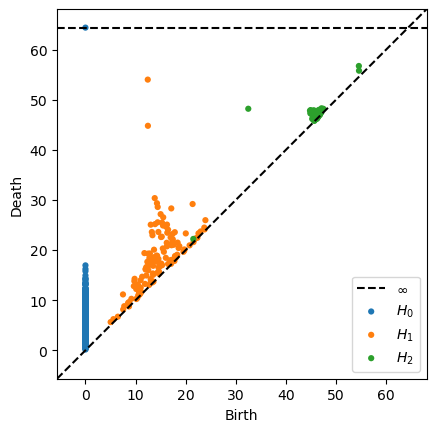

In [35]:
plot_diagrams(diagrams, show=True)